# Homegrown Gaussian Naive Bayes Algorithm
### Goal: Create a naive bayes algorithm that will predict if a person will develop diabetes using the pima-data dataset.
### Rules: I can use any library except for sci kit, and I cannot do any research into how sci kit learn implements the naive bayes algorithm.

This project is mostly inspired by this video: https://www.youtube.com/watch?v=H3EjCKtlVog

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [11]:
df = pd.read_csv("./pima-data.csv") #load Pima data.
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [4]:
#First, I need to do the same cleanup as I did in the other tutorial.
del df['skin'] #delete skin
diabetes_map = {True: 1, False: 0}
df['diabetes'] = df['diabetes'].map(diabetes_map) #map diabetes booleans to 0 or 1
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\emscanl\AppData\Local\Temp\ipykernel_31720\3555146875.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hasDiabetes, color="dodgerblue", label="Compact", **kwargs)
C:\Users\emscanl\AppData\Local\Temp\ipykernel_31720\3555146875.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(noDi

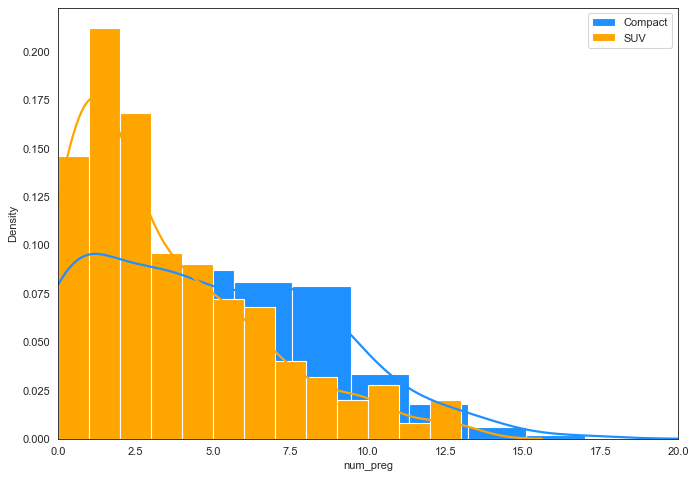

In [31]:
sns.set_style("white")

# import data
hasDiabetes = df.loc[df.diabetes == 1, 'num_preg']
noDiabetes = df.loc[df.diabetes == 0, 'num_preg']

# Plot
kwargs = dict(hist_kws={'alpha':1}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(hasDiabetes, color="dodgerblue", label="Compact", **kwargs)
sns.distplot(noDiabetes, color="orange", label="SUV", **kwargs)
plt.xlim(0,20)
plt.legend();
